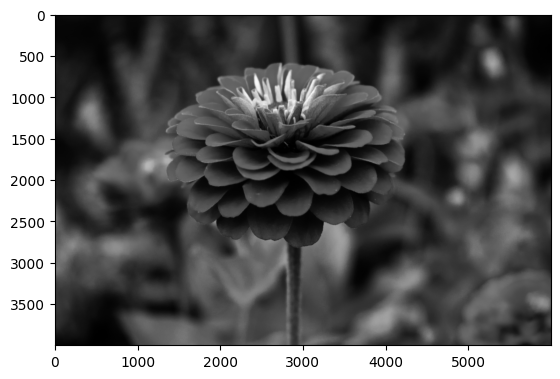

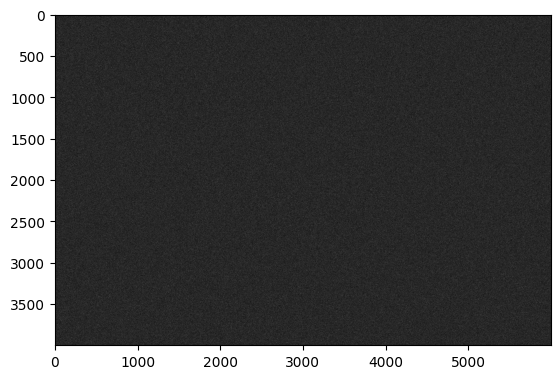

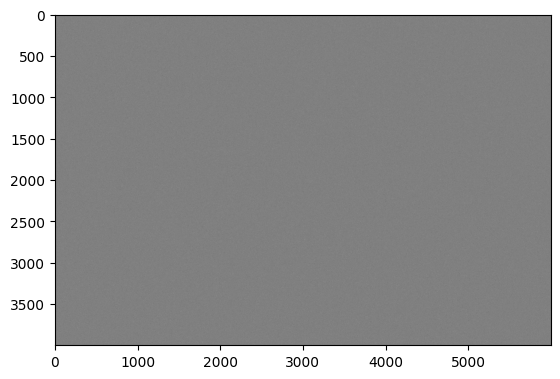

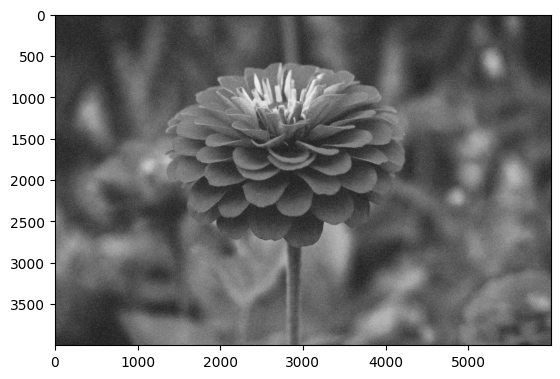

Давайте пошумим
4498.42281 0.02586061042392922
844.2647662083333 0.15358064942568786


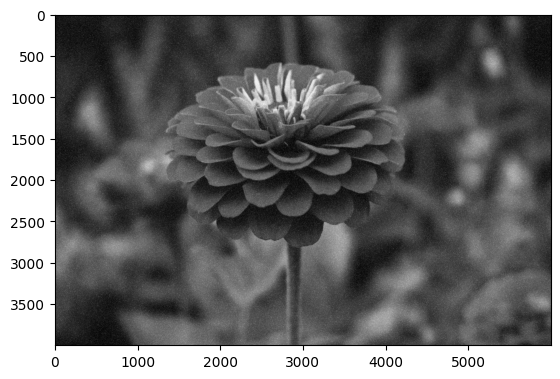

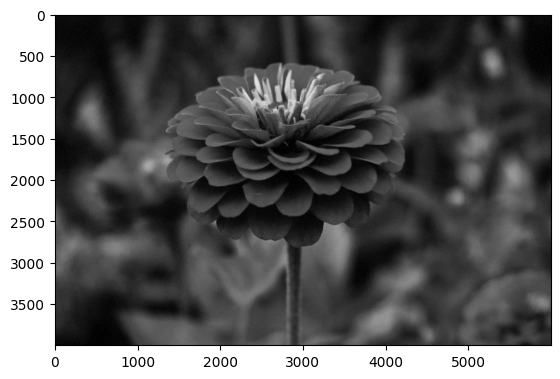

Еще пошумим
447.924951875 0.5481537526757333
7.716590833333333 0.9115432798526223
Gauss filter


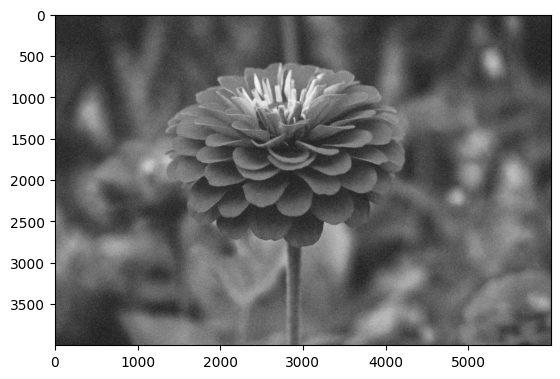

Bilat filter


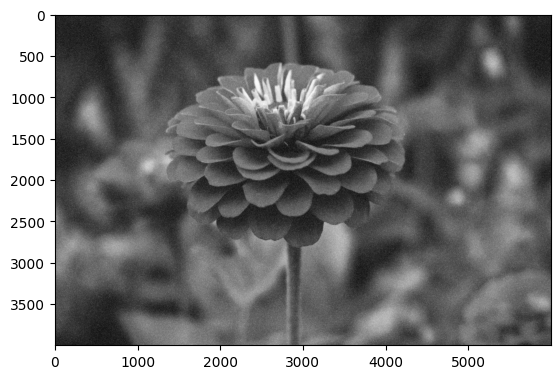

nlm filter


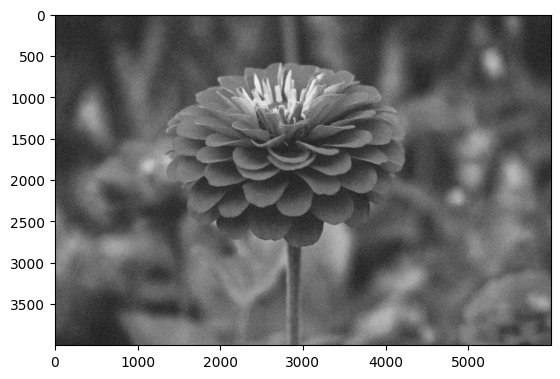

averaging filter


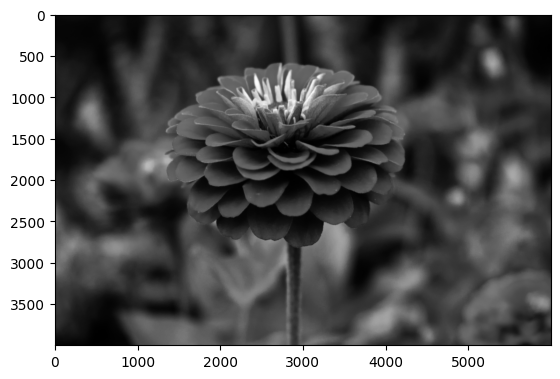

0.0 1.0
Laplasian filter


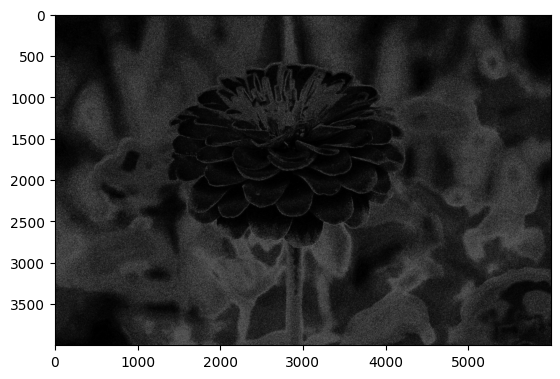

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy
import math

from skimage.metrics import structural_similarity, mean_squared_error


image = cv2.imread('img.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Оригинальное изображение
plt.imshow(image_gray, cmap = "gray")
plt.show()

#1 задание. Шумим фильтрами
mean = 0
stddev = 100
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)
plt.imshow(noise_gauss, cmap = "gray")
plt.show()

noise = np.random.randint(0, 101, size = (image_gray.shape[0], image_gray.shape[1]), dtype = int)
zeros_pixel = np.where(noise == 0)
ones_pixel = np.where(noise == 100)

bg_image = np.ones(image_gray.shape, np.uint8) * 128
bg_image[zeros_pixel] = 0
bg_image[ones_pixel] = 255
plt.imshow(bg_image, cmap = "gray")
plt.show()

image_noise_gauss = cv2.add(image_gray, noise_gauss)
plt.imshow(image_noise_gauss, cmap = "gray")
plt.show()

# 2 задание. Проверка на то, какой фильтр показал лучший результат фильтрации шума
print("Давайте пошумим")
mse_gauss = mean_squared_error(image_gray, image_noise_gauss)
(ssim, diff) = structural_similarity(image_gray, image_noise_gauss, full=True)
print(mse_gauss, ssim)

image_gauss_median = cv2.medianBlur(image_noise_gauss, 3)
mse_gauss_median = mean_squared_error(image_gray, image_gauss_median)
(ssim_gauss_median, diff) = structural_similarity(image_gray,  image_gauss_median, full=True)
print(mse_gauss_median, ssim_gauss_median)

plt.imshow(image_gauss_median, cmap="gray")
plt.show()


image_sp = copy.deepcopy(image_gray)

image_sp[zeros_pixel] = 0
image_sp[ones_pixel] = 255
plt.imshow(image_sp, cmap="gray")
plt.show()

#Еще пошумим
print("Еще пошумим")
mse_sp = mean_squared_error(image_gray, image_sp)
(ssim_sp, diff) = structural_similarity(image_gray, image_sp, full=True)
print(mse_sp, ssim_sp)

image_sp_median = cv2.medianBlur(image_sp, 3)
mse_sp_median = mean_squared_error(image_gray, image_sp_median)
(ssim_sp_median, diff) = structural_similarity(image_gray, image_sp_median, full=True)
print(mse_sp_median, ssim_sp_median)

#3 задание. Фильтры?
print("Gauss filter")
image_gauss_gauss = cv2.GaussianBlur(image_noise_gauss,(5,5),0)
plt.imshow(image_gauss_gauss, cmap = "gray")
plt.show()

print("Bilat filter")
image_gauss_bilat = cv2.bilateralFilter(image_noise_gauss,9,75,75)
plt.imshow(image_gauss_bilat, cmap = "gray")
plt.show()

print("nlm filter")
image_gauss_nlm = cv2.fastNlMeansDenoising(image_noise_gauss, h = 20)
plt.imshow(image_gauss_nlm, cmap = "gray")
plt.show()

print("averaging filter")
kernel_5 = np.ones((5,5),np.float32)/25
image_k5 = cv2.filter2D(image_gray,-1,kernel_5)
plt.imshow(image_k5, cmap = "gray")
plt.show()

image_b5 = cv2.blur(image_gray,(5,5))
mse_kb = mean_squared_error(image_k5, image_b5)
(ssim_kb, diff) = structural_similarity(image_k5, image_b5, full=True)
print(mse_kb, ssim_kb)

print("Laplasian filter")
# Laplasian
kernel_lapl = np.array([[0,-10,0],
                        [-10,40,-10],
                        [0,-10,0]], np.float32)
image_lapl = cv2.filter2D(image_gray,-1,kernel_lapl) 
plt.imshow(image_lapl, cmap="gray")
plt.show()